<a href="https://colab.research.google.com/github/JessicaGtz21/regresi-n-lineal-homicidios-/blob/main/CODIGO_DE_R_EN_JULIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-11-13 15:58:26 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  554.757 ms (2 allocations: 32.00 MiB)


In [ ]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

In [ ]:
] add Plots PyPlot GR UnicodePlots


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed GR_jll ─────────────────────── v0.72.10+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Contour ────────────────────── v0.6.2
   Installed MarchingCubes ──────────────── v0.1.8
   Installed Unitful ────────────────────── v1.18.0
   Installed Measures ───────────────────── v0.3.2
   Installed ConcurrentUtilities ────────── v2.3.0
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed StaticArrays ───────────────── v1.6.5
   Installed Xorg

In [ ]:
using Plots
pyplot()

Plots.PyPlotBackend()

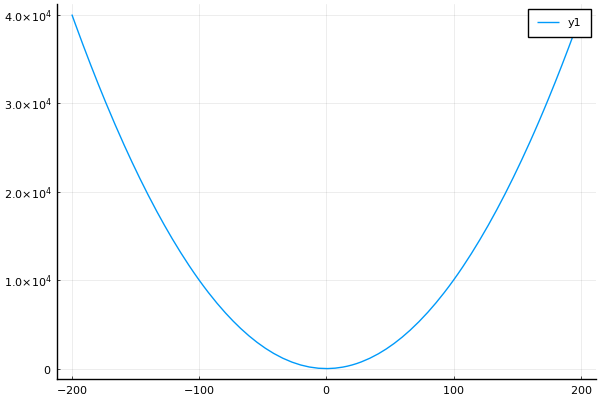

In [ ]:
eq(d) = d^2
plot(eq, -200,200)

In [ ]:
A= Float64[0.269, 0.066,-1.121,-0.349,0.545,0.64,-0.958,-0.114,-1.377,-0.006,1.352,1.006]


12-element Vector{Float64}:
  0.269
  0.066
 -1.121
 -0.349
  0.545
  0.64
 -0.958
 -0.114
 -1.377
 -0.006
  1.352
  1.006

In [ ]:
print("¿Cuántos años tienes?")
edad = readline()



¿Cuántos años tienes?stdin> 34


"34"

In [ ]:
b=parse(Int,edad)



34

In [ ]:
typeof(b)

Int64

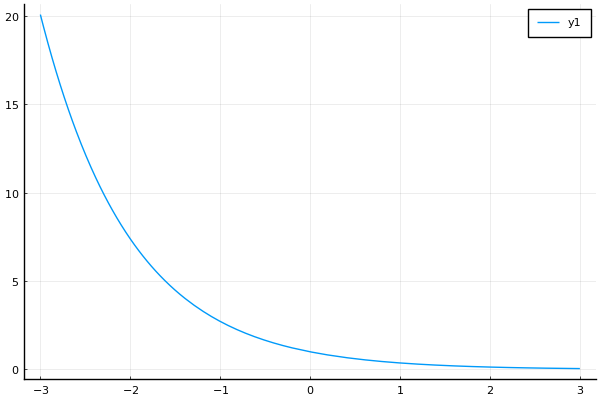

In [ ]:
using Plots

f(x) = exp(-x)
plot(f, -3, 3)

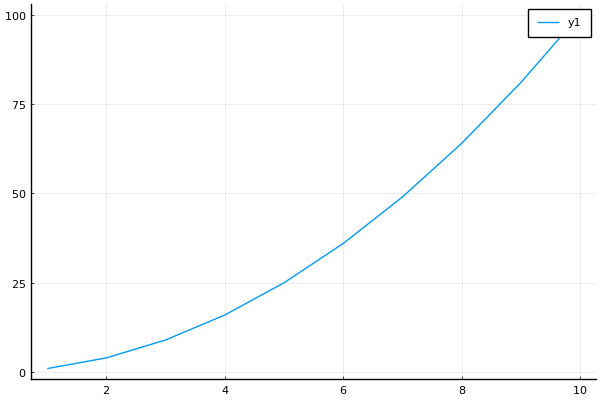

In [ ]:
using Plots
x=1:10
y=x.^2
plot(x,y)

In [ ]:
] add RCall  DataArrays DataFrames


   Resolving package versions...
   Installed InvertedIndices ───────────── v1.3.0
   Installed Missings ──────────────────── v0.4.5
   Installed StatsFuns ─────────────────── v0.9.7
   Installed PlotUtils ─────────────────── v1.2.0
   Installed InlineStrings ─────────────── v1.4.0
   Installed RCall ─────────────────────── v0.13.18
   Installed DataArrays ────────────────── v0.7.0
   Installed DataFrames ────────────────── v1.5.0
   Installed WinReg ────────────────────── v1.0.0
   Installed Rmath_jll ─────────────────── v0.4.0+0
   Installed StatsModels ───────────────── v0.7.3
   Installed SentinelArrays ────────────── v1.4.1
   Installed SpecialFunctions ──────────── v0.10.3
   Installed SnoopPrecompile ───────────── v1.0.3
   Installed TableTraits ───────────────── v1.0.1
   Installed PooledArrays ──────────────── v1.4.3
   Installed DataValueInterfaces ───────── v1.0.0
   Installed Reexport ──────────────────── v0.2.0
   Installed OpenSpecFun_jll ───────────── v0.5.5+0
   Install

In [ ]:
] add RCall

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
using RCall, DataFrames,  DataArrays


In [ ]:
R"""
      for (x in 1:10)
       {print(x)}
       """


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


RObject{NilSxp}
NULL


In [ ]:
using Pkg
Pkg.add("RCall")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


[1] "Hola desde R en Julia"


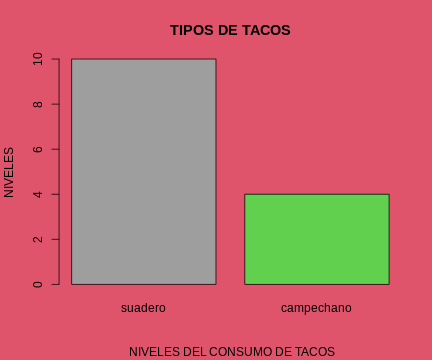

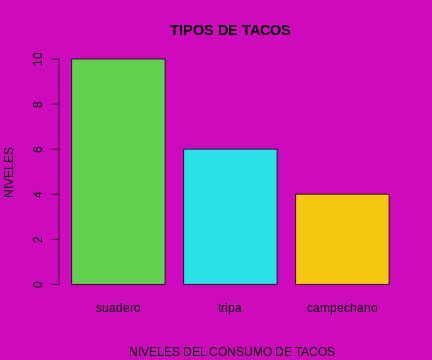

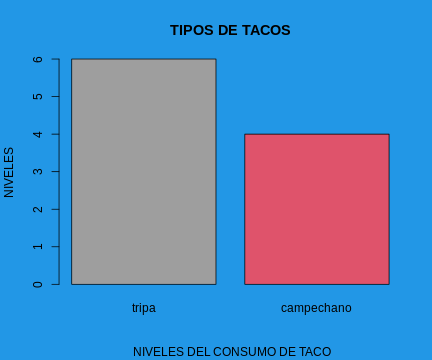

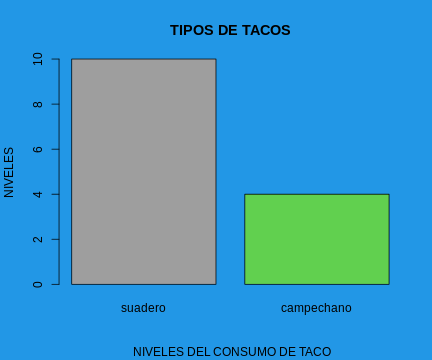

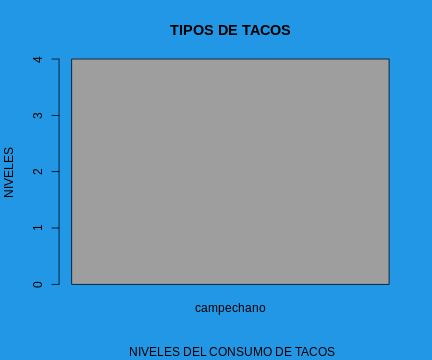

RObject{RealSxp}
     [,1]
[1,]  0.7


In [ ]:
using RCall

# Ejemplo de código R
R"""
print("Hola desde R en Julia")
#crear los siguientes vectores
#tacos=suadero,tripa,campechano

tacos <- c("suadero", "tripa","campechano","suadero", "tripa", "tripa","suadero","suadero","tripa","suadero","suadero","campechano",
           "suadero","tripa","suadero","suadero","campechano","tripa","campechano","suadero" )

tacos

#crear una variable  llamada categoria con estos elementos
niveles <- c("suadero","tripa","campechano")

categoria_tacos <- factor(x =tacos,levels =niveles)
categoria_tacos <- factor(x =tacos, levels =niveles)
class(categoria_tacos)

categoria <- factor (x=c("suadero", "tripa","campechano","suadero", "tripa", "tripa","suadero","suadero","tripa","suadero","suadero","campechano",
                         "suadero","tripa","suadero","suadero","campechano","tripa","campechano","suadero" ), levels = c("suadero","tripa","campechano"))
categoria


#calcular el promedio de cada nivel

total <- length(tacos)
total

length(tacos[tacos=="suadero"])/length(tacos)
length(tacos[tacos=="tripa"])/length(tacos)
length(tacos[tacos=="campechano"])/length(tacos)

calcular <- c(length(tacos[tacos=="suadero"])/length(tacos),
              length(tacos[tacos=="tripa"])/length(tacos),
              length(tacos[tacos=="campechano"])/length(tacos))
calcular

#suma el total de cada nivel

length(tacos[tacos=="suadero"])
length(tacos[tacos=="tripa"])
length(tacos[tacos=="campechano"])

#compara que si el nivel de SUADERO es mayor al nivel TRiPA

categoria<- factor(x =tacos, levels =niveles)


class(categoria)


categoria <- factor (x=c("suadero", "tripa","campechano","suadero", "tripa", "tripa","suadero","suadero","tripa","suadero","suadero","campechano",
                         "suadero","tripa","suadero","suadero","campechano","tripa","campechano","suadero" ),
                     levels = c("suadero","campechano"))
categoria


par(bg =10)

plot(categoria, col=c(8,11,6), sub = " NIVELES DEL CONSUMO DE TACOS",
     main  ="TIPOS DE TACOS", ylab="NIVELES")

#realizar el grafico con titulos, subtitulo y titulo  a eje y
#colocar color a la grafica y al fondo
#aqui saldra la gráfica de lo tres  tipos de tacos

par(bg =30)

plot(categoria_tacos, col=c(35,5,7), sub = " NIVELES DEL CONSUMO DE TACOS",
     main  ="TIPOS DE TACOS", ylab="NIVELES")

#extraer unicamente a los elementos CAMPECHANO Y TRIPA

categoria1 <- factor(x=tacos, levels =niveles)
class(categoria1)


categoria1 <- factor (x=c("suadero", "tripa","campechano","suadero", "tripa", "tripa","suadero","suadero","tripa","suadero","suadero","campechano",
                          "suadero","tripa","suadero","suadero","campechano","tripa","campechano","suadero"), levels = c("tripa","campechano"))

categoria1

par(bg =4)

plot(categoria1, col=c(8,10,6), sub = " NIVELES DEL CONSUMO DE TACO",
     main  ="TIPOS DE TACOS", ylab="NIVELES")


#extraer el elemento mayor de los niveles

plot(categoria, col=c(8,11,6), sub = " NIVELES DEL CONSUMO DE TACO",
     main  ="TIPOS DE TACOS", ylab="NIVELES")

#dimension de sadero y tripa
length(tacos[tacos=="suadero"])
length(tacos[tacos=="tripa"])
#cual es el menor elemento de los tacos
length(tacos[tacos=="campechano"])
#creamos la segunda variale llamada cateoria 2
categoria2 <- factor(x=tacos, levels =niveles)
class(categoria2)
categoria2 <- factor (x=c("suadero", "tripa","campechano","suadero", "tripa", "tripa","suadero","suadero","tripa","suadero","suadero","campechano",
                          "suadero","tripa","suadero","suadero","campechano","tripa","campechano","suadero" ), levels = c("campechano"))

categoria2

plot(categoria2, col=c(8,11,6), sub = " NIVELES DEL CONSUMO DE TACOS",
     main  ="TIPOS DE TACOS", ylab="NIVELES")

"""
